In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [4]:
my_data = pd.read_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 3/my_data.csv')
hist_data = pd.read_csv('C:/Users/Guoli/Documents/Data Science Material/Projects/BCG/Task 3/hist_data.csv')

In [5]:
my_data.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_meter_rent_12m,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,...,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,has_gas_t,origin_up_ewxeelce,origin_up_kamkkxfx,origin_up_ldkssxwp,origin_up_lxidpidd,origin_up_usapbepc
0,48ada52261e7cf58715202705a0451c9,12.641989,0.000000,9.212937,10.185703,5.886909,0.088347,58.995952,6.724794,NaN,...,0,1,0,0,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0.000000,10.914124,0.000000,0.000000,1.022451,0.098142,40.606701,0.000000,3.274878,...,1,0,0,0,1,0,0,0,1,0


In [6]:
hist_data.head(2)

,id,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.103794,0.07316,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.000000,0.00000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000


In [7]:
train_data = pd.merge(my_data, hist_data, on ='id')

In [8]:
pd.DataFrame({'DataFrame Columns': train_data.columns})

,DataFrame Columns
0,id
1,cons_12m
2,cons_gas_12m
3,cons_last_month
4,forecast_cons_12m
5,forecast_meter_rent_12m
6,forecast_price_energy_p2
7,forecast_price_pow_p1
8,imp_cons
9,margin_gross_pow_ele


In [9]:
train_data.isna().sum()

id                             0
cons_12m                      27
cons_gas_12m                   5
cons_last_month               45
forecast_cons_12m             39
forecast_meter_rent_12m        3
forecast_price_energy_p2       0
forecast_price_pow_p1          0
imp_cons                      26
margin_gross_pow_ele        1049
margin_net_pow_ele             0
nb_prod_act                    0
net_margin                     0
num_years_antig                0
pow_max                        0
churn                          0
channel_sales_epum             0
channel_sales_ewpa             0
channel_sales_fixd             0
channel_sales_foos             0
channel_sales_lmke             0
channel_sales_sddi             0
channel_sales_usil             0
has_gas_t                      0
origin_up_ewxeelce             0
origin_up_kamkkxfx             0
origin_up_ldkssxwp             0
origin_up_lxidpidd             0
origin_up_usapbepc             0
mean_year_price_p2_var         0
mean_year_

In [26]:
train_data.fillna(train_data.mean(), inplace = True)

In [33]:
train_data.isna().sum()

id                          0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
forecast_cons_12m           0
forecast_meter_rent_12m     0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
pow_max                     0
churn                       0
channel_sales_epum          0
channel_sales_ewpa          0
channel_sales_fixd          0
channel_sales_foos          0
channel_sales_lmke          0
channel_sales_sddi          0
channel_sales_usil          0
has_gas_t                   0
origin_up_ewxeelce          0
origin_up_kamkkxfx          0
origin_up_ldkssxwp          0
origin_up_lxidpidd          0
origin_up_usapbepc          0
mean_year_price_p2_var      0
mean_year_price_p3_var      0
mean_year_price_p1_fix      0
mean_year_price_p2_fix      0
mean_year_

In [28]:
train_data.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_meter_rent_12m',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn',
       'channel_sales_epum', 'channel_sales_ewpa', 'channel_sales_fixd',
       'channel_sales_foos', 'channel_sales_lmke', 'channel_sales_sddi',
       'channel_sales_usil', 'has_gas_t', 'origin_up_ewxeelce',
       'origin_up_kamkkxfx', 'origin_up_ldkssxwp', 'origin_up_lxidpidd',
       'origin_up_usapbepc', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3'],
      dtype='object')

In [12]:
y = train_data[['churn']]

In [13]:
X = train_data.drop(labels = ['id', 'churn'], axis =1)

In [40]:
#X.fillna(X.mean(), inplace =True)
#X.isna().sum()

### Modeling by Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.25, random_state =42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy:{:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy:0.90


C:\Users\Guoli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Guoli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
pd.DataFrame(logreg.predict(X_test))

,0
0,0
1,0
2,0
3,0
4,0
...,...
3954,0
3955,0
3956,0
3957,0


In [54]:
y_test

,churn
13342,0
169,0
2099,0
4948,0
5771,0
...,...
10918,0
5133,0
8126,0
6700,0


### Moledling by Gradient Boosted regression tree

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.25, random_state =0)
gbrt = GradientBoostingClassifier(random_state =0, max_depth =1)
gbrt.fit(X_train, y_train)
print('Accuracy:{:.2f}'.format(gbrt.score(X_test, y_test)))

C:\Users\Guoli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy:0.90


In [136]:
def plot_feature_importances_X(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)
    #figure(figsize=(20,10), dpi=80)

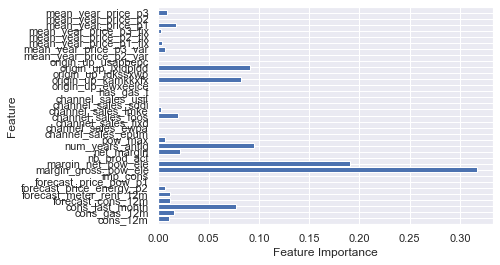

In [137]:
plot_feature_importances_X(gbrt)

As we can see that 'margin_gross_pow_ele' and  'margin_net_pow_ele' are the most informative features overall.

### Modeling by XGBClassifier

In [72]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [73]:
model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 500, n_jobs =-1)
train_results = model.fit(X_train, y_train)


C:\Users\Guoli\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Guoli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[19:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [74]:
pred_result = model.predict(X_test)

In [76]:
print('Accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, pred_result)))

Accuracy:0.903


In [77]:
#Precision : The ratio of correctly predicted positive observations to the total predicted positive observations
print('Precision:{:.3f}'.format(metrics.precision_score(y_test, pred_result)))

Precision:0.656


In [80]:
#Recall (Sensitivity): The ratio of correctly predicted positive observations to the all observations in actual class
print('Recall:{:.3f}'.format(metrics.recall_score(y_test, pred_result)))

Recall:0.099


In [85]:
pd.DataFrame({'Accuracy':[metrics.accuracy_score(y_test, pred_result)],
            'Precision': [metrics.precision_score(y_test, pred_result)],
            'Recall':  [metrics.recall_score(y_test, pred_result)]})

,Accuracy,Precision,Recall
0,0.902501,0.655738,0.098765


### ROC-AUC 
(it tells how much model is capable of distinguishing between classes.)

In [86]:
def calculate_roc_auc(model_, X_test_, y_test_):
    # Get the model predictions
    # Note that we are using the prediction for the class 1 -> churn
    pred_result_ = model_.predict_proba(X_test_)[:,1]
    
    # Calculate ROC-AUC
    fpr, tpr, thresholds = metrics.roc_curve(y_test_, pred_result_)
    
    # Print the evaluation metrics as pandas dataframe
    score = pd.DataFrame({'ROC-AUC': [metrics.auc(fpr,tpr)]})
    
    return fpr,tpr,score
  

In [123]:
def plot_roc_auc(fpr, tpr):
    #Initialize the plot
    fig, axes = plt.subplots(figsize=(16,10))
    
    #plot roc
    roc_auc = metrics.auc(fpr,tpr)
    axes.plot(fpr, tpr, lw = 2, alpha =0.3, label = 'AUC = %0.2f' % (roc_auc))
    
    # Plot the random line.
    plt.plot([0,1], [0,1], linestyle = '--', lw =3, color = 'r', label = 'Random', alpha = 0.8)
    axes.set_xlim([-0.05, 1.05])
    axes.set_ylim([-0.05, 1.05])
    axes.set_xlabel('False Positive Rate')
    axes.set_ylabel('True Positive Rate')
    axes.set_title('ROC-AUC')
    axes.legend(loc='best')
    plt.show()

In [124]:
fpr,tpr,auc_score = calculate_roc_auc(model, X_test, y_test)

In [110]:
auc_score

,ROC-AUC
0,0.678371


In [111]:
#Gradient Boost Regression model
calculate_roc_auc(gbrt, X_test, y_test)[2]

,ROC-AUC
0,0.6731


In [112]:
#Logistic Regression model
calculate_roc_auc(logreg, X_test, y_test)[2]

,ROC-AUC
0,0.628742


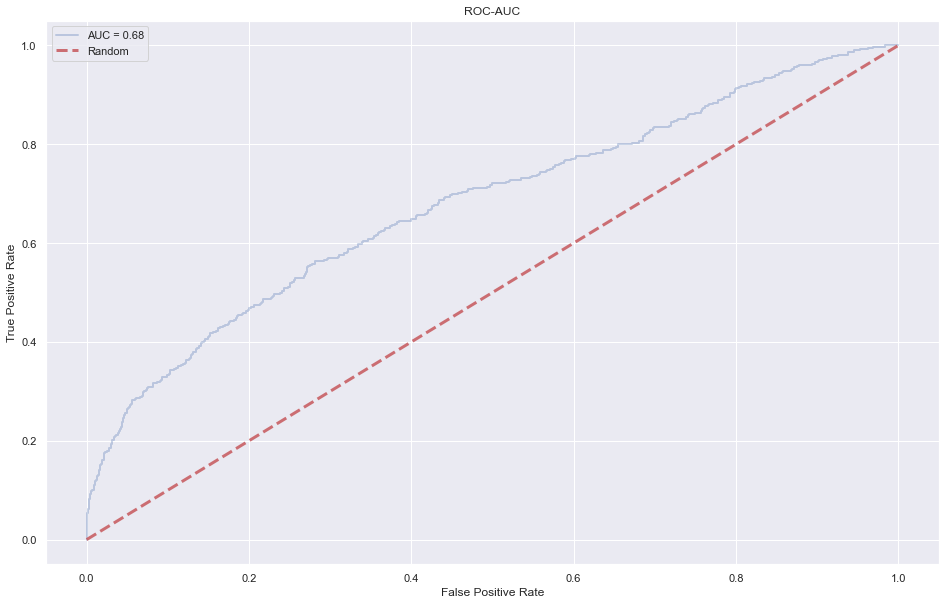

In [113]:
sns.set(color_codes = True)
plot_roc_auc(fpr, tpr)

In [116]:
#Create a model with the parameters found
model_grid = xgb.XGBClassifier(objective='binary:logistic', silent=True, nthread=1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

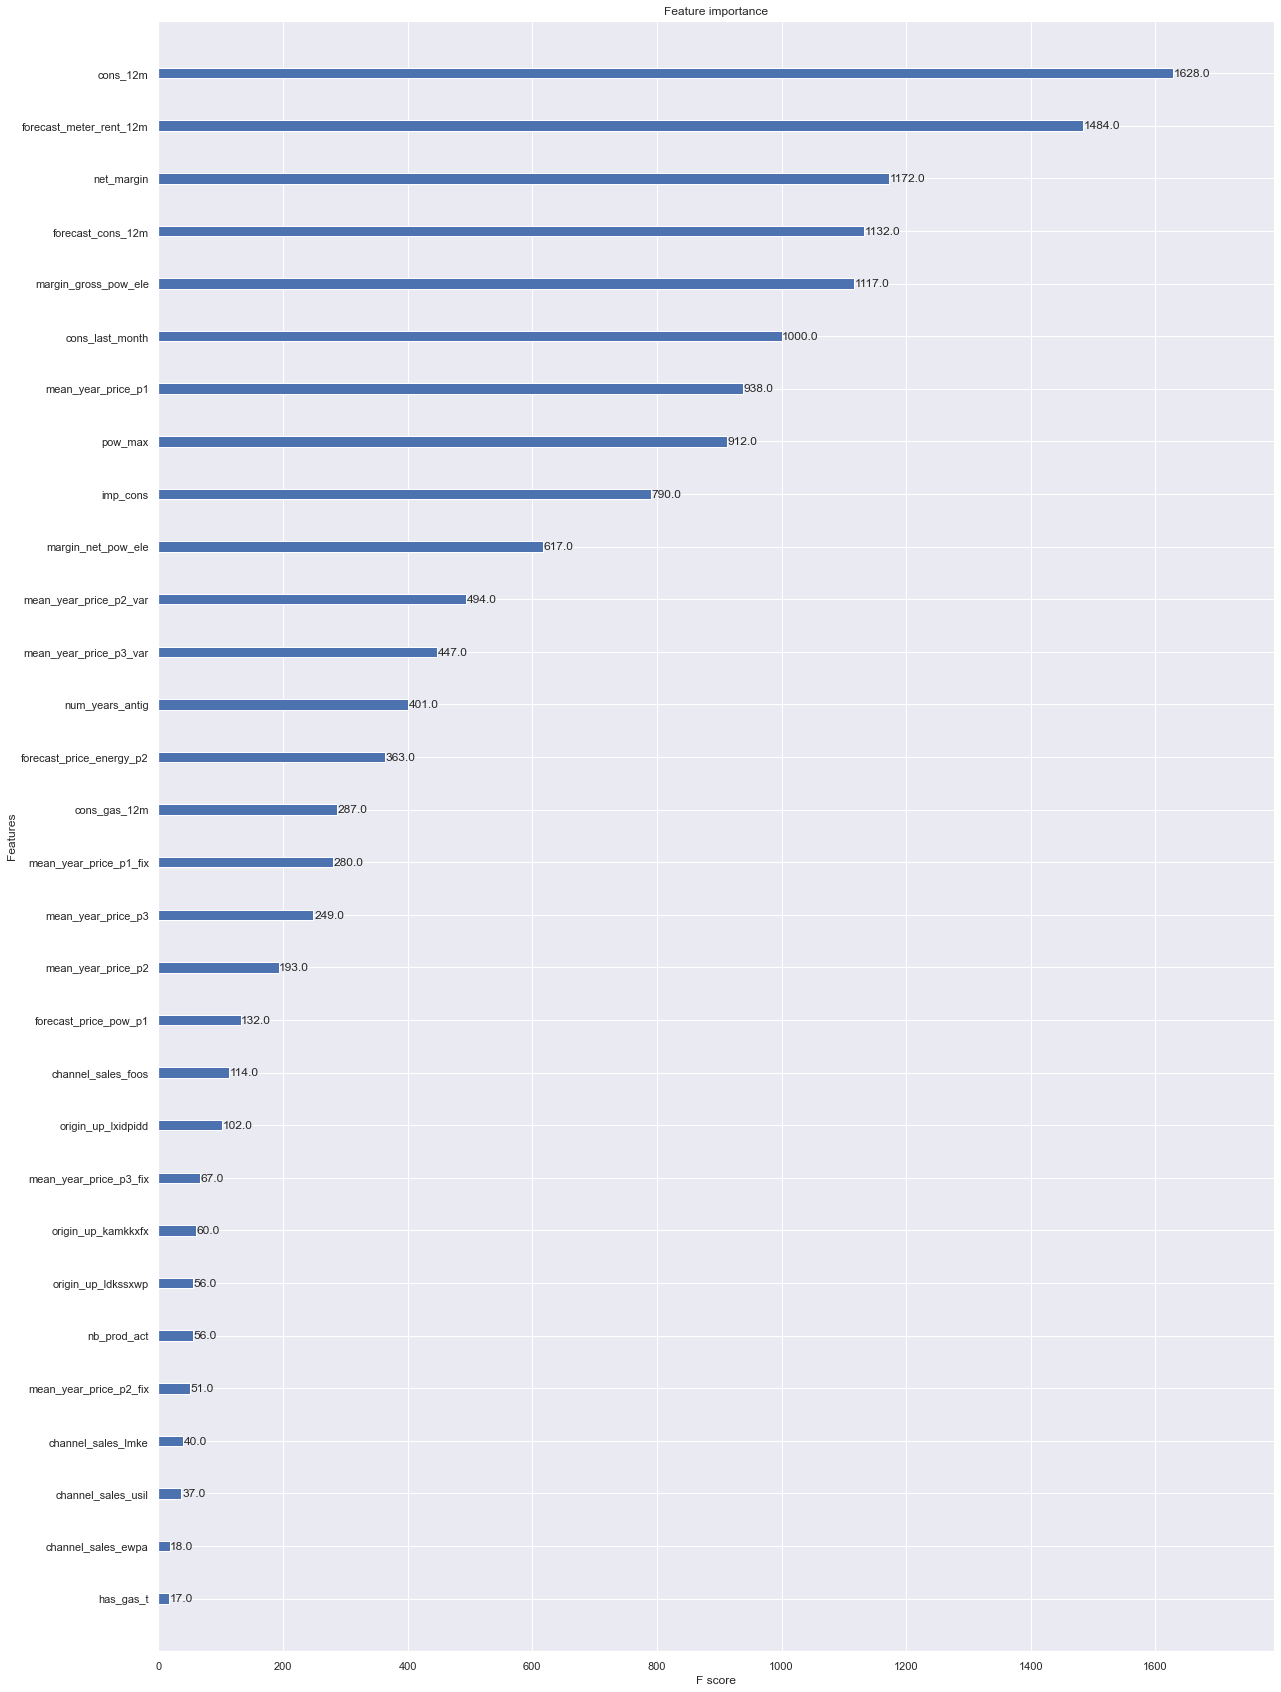

In [140]:
fig, axx = plt.subplots(figsize = (20,30))
xgb.plot_importance(model, ax = axx)

In the feature importance graph above, we can see that cons_12m and forecast_meter_rent_12m are the features that appear the most in our model. So we could infere that these two features have a significent importance in our model.